In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
import joblib
from pandas.api.types import is_string_dtype,is_numeric_dtype

In [125]:
df=pd.read_csv('hapiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [126]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [127]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [128]:
df.isin(['?']).sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [129]:
df.isin(['-']).sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [130]:
df.isin([0]).sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [131]:
df.dtypes


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [132]:
df['Country'].unique().shape

(158,)

In [133]:
#finding country wise happiness score
country_wise_happy_score=df.groupby(['Country']).sum()['Happiness Score']
print(country_wise_happy_score)


Country
Afghanistan    3.575
Albania        4.959
Algeria        5.605
Angola         4.033
Argentina      6.574
               ...  
Venezuela      6.810
Vietnam        5.360
Yemen          4.077
Zambia         5.129
Zimbabwe       4.610
Name: Happiness Score, Length: 158, dtype: float64


Text(0, 0.5, 'Country')

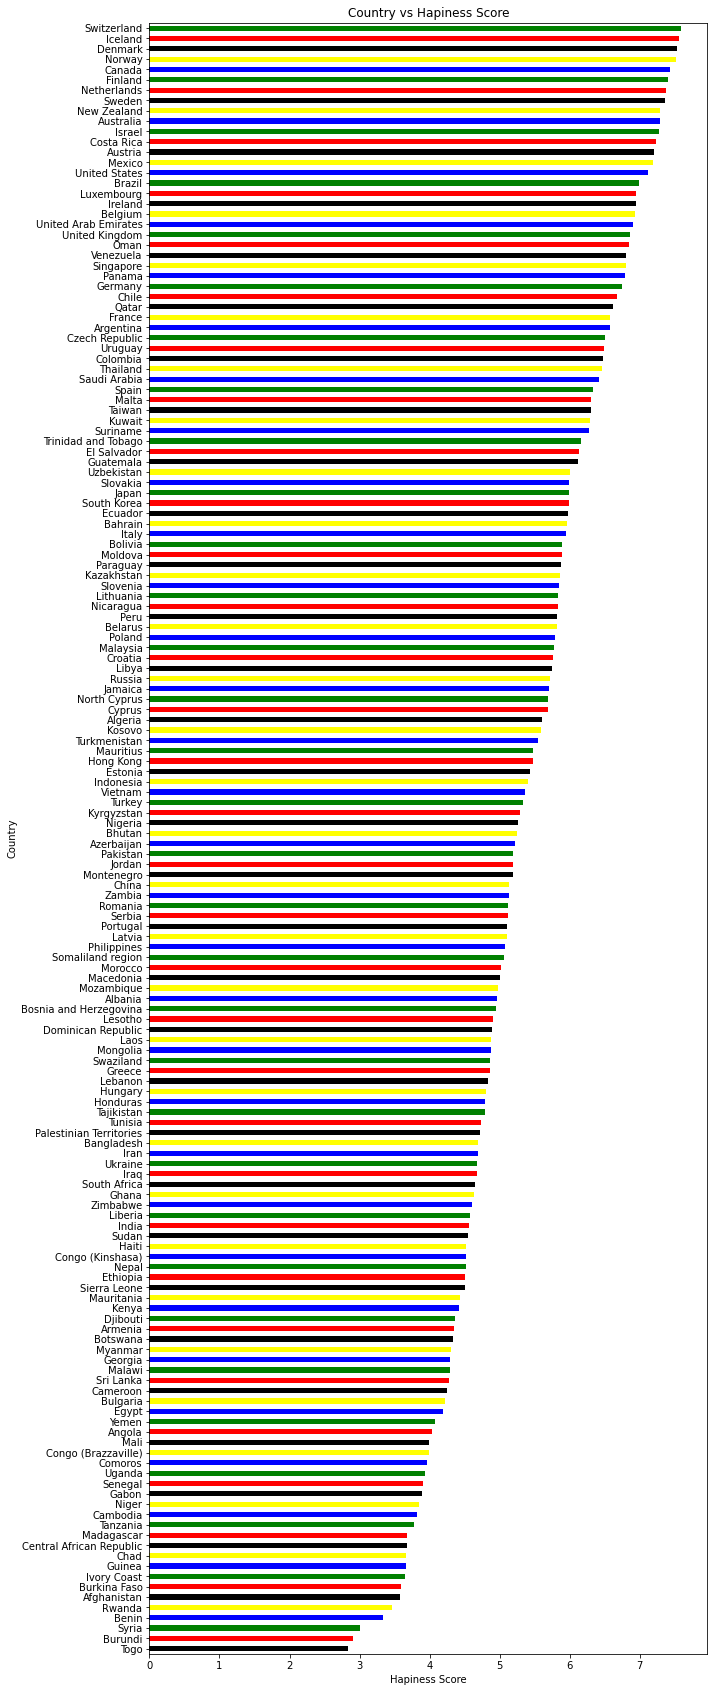

In [134]:
#Finding country wise hapiness score
#from below graph switzerland is the most hapiest country and togo is least happiest country in world
country_wise_happy_score.sort_values().plot(kind='barh',figsize=(10,30),color=['black', 'red', 'green', 'blue', '#FFFF00'])
plt.title("Country vs Hapiness Score")
plt.xlabel("Hapiness Score")
plt.ylabel("Country")

In [135]:
country_wise_happy_score_economy=df.groupby(['Country']).agg({'Economy (GDP per Capita)':'sum','Happiness Score':'sum'})
print(country_wise_happy_score_economy)


             Economy (GDP per Capita)  Happiness Score
Country                                               
Afghanistan                   0.31982            3.575
Albania                       0.87867            4.959
Algeria                       0.93929            5.605
Angola                        0.75778            4.033
Argentina                     1.05351            6.574
...                               ...              ...
Venezuela                     1.04424            6.810
Vietnam                       0.63216            5.360
Yemen                         0.54649            4.077
Zambia                        0.47038            5.129
Zimbabwe                      0.27100            4.610

[158 rows x 2 columns]


Text(0, 0.5, 'Country')

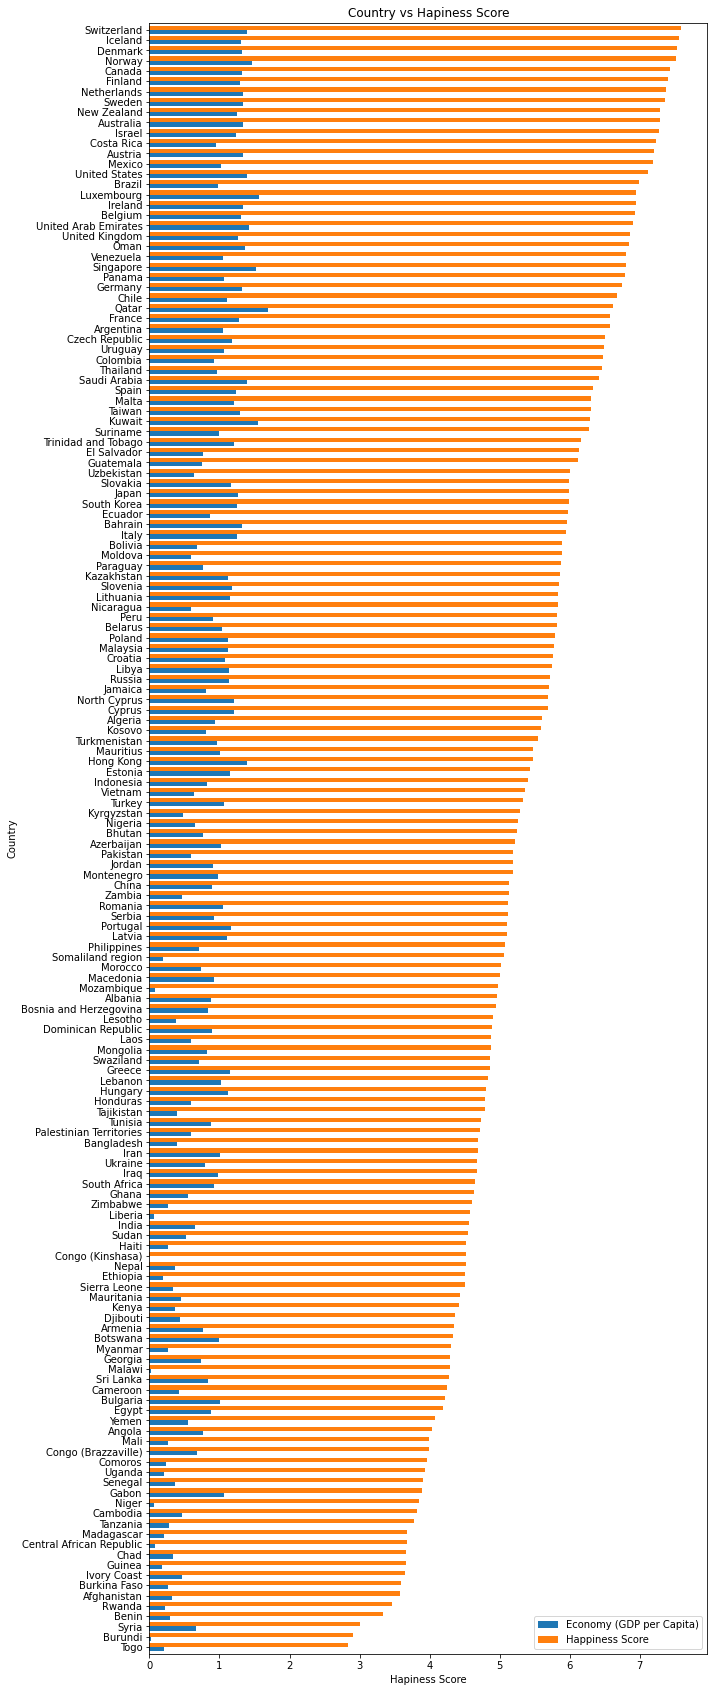

In [136]:
#Finding country wise hapiness score
#from below graph switzerland is the most hapiest country and togo is least happiest country in world
country_wise_happy_score_economy.sort_values(by=['Happiness Score']).plot(kind='barh',figsize=(10,30),width=0.8,align='center')
plt.title("Country vs Hapiness Score")
plt.xlabel("Hapiness Score")
plt.ylabel("Country")

In [137]:
#converting string type to int by using label encoder
for col in df.columns:
    if(is_string_dtype(df[col])):
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
    


In [138]:
df.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [139]:
for col in df.columns:
    if(df[col].isin([0]).sum()>0):
        simpleImputer=SimpleImputer(missing_values=0,strategy='mean')
        simpleImputer.fit(df[[col]])
        df[col]=simpleImputer.fit_transform(df[[col]]).ravel()

In [140]:
df.isin([0]).sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [141]:
corr_=df.corr()
corr_

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,-0.000558,-0.081644,0.066717,0.023166,0.009862,0.109864,0.039854,0.067100,0.081887,0.124405,-0.022913
Region,-0.000558,1.000000,0.183508,-0.142710,-0.036968,-0.230701,-0.128304,-0.329344,0.122575,0.218112,0.336998,-0.051626
Happiness Rank,-0.081644,0.183508,1.000000,-0.992105,0.158516,-0.784513,-0.730402,-0.735569,-0.558610,-0.374954,-0.156000,-0.521999
Happiness Score,0.066717,-0.142710,-0.992105,1.000000,-0.177254,0.781996,0.738034,0.727119,0.572117,0.397176,0.176879,0.530474
Standard Error,0.023166,-0.036968,0.158516,-0.177254,1.000000,-0.229614,-0.107382,-0.294761,-0.128431,-0.188985,-0.087513,0.083981
Economy (GDP per Capita),0.009862,-0.230701,-0.784513,0.781996,-0.229614,1.000000,0.637393,0.794147,0.373248,0.305643,-0.000289,0.059576
Family,0.109864,-0.128304,-0.730402,0.738034,-0.107382,0.637393,1.000000,0.507689,0.471164,0.206215,0.089562,0.182287
Health (Life Expectancy),0.039854,-0.329344,-0.735569,0.727119,-0.294761,0.794147,0.507689,1.000000,0.373403,0.247199,0.121389,0.031793
Freedom,0.067100,0.122575,-0.558610,0.572117,-0.128431,0.373248,0.471164,0.373403,1.000000,0.510130,0.350389,0.059552
Trust (Government Corruption),0.081887,0.218112,-0.374954,0.397176,-0.188985,0.305643,0.206215,0.247199,0.510130,1.000000,0.284399,-0.036523


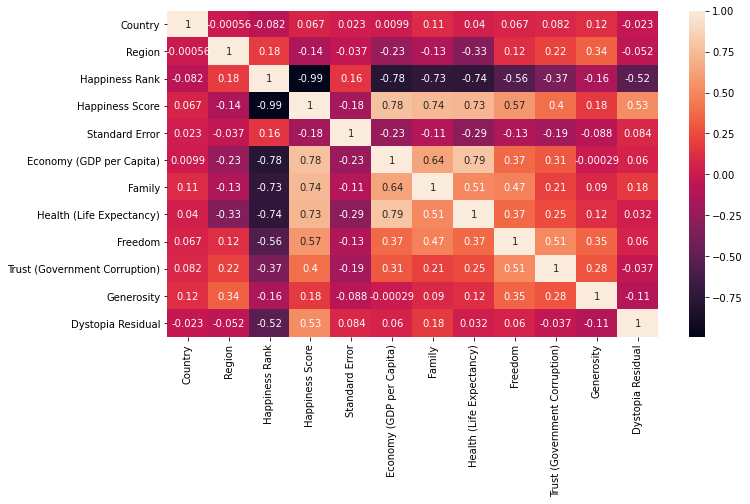

In [142]:
plt.figure(figsize=(11,6))
sns.heatmap(data=corr_,annot=True)

In [143]:
#removing hapiness rank column .It has -ve corel with hapiness score
df=df.drop('Happiness Rank',axis=1)
df.shape

(158, 11)

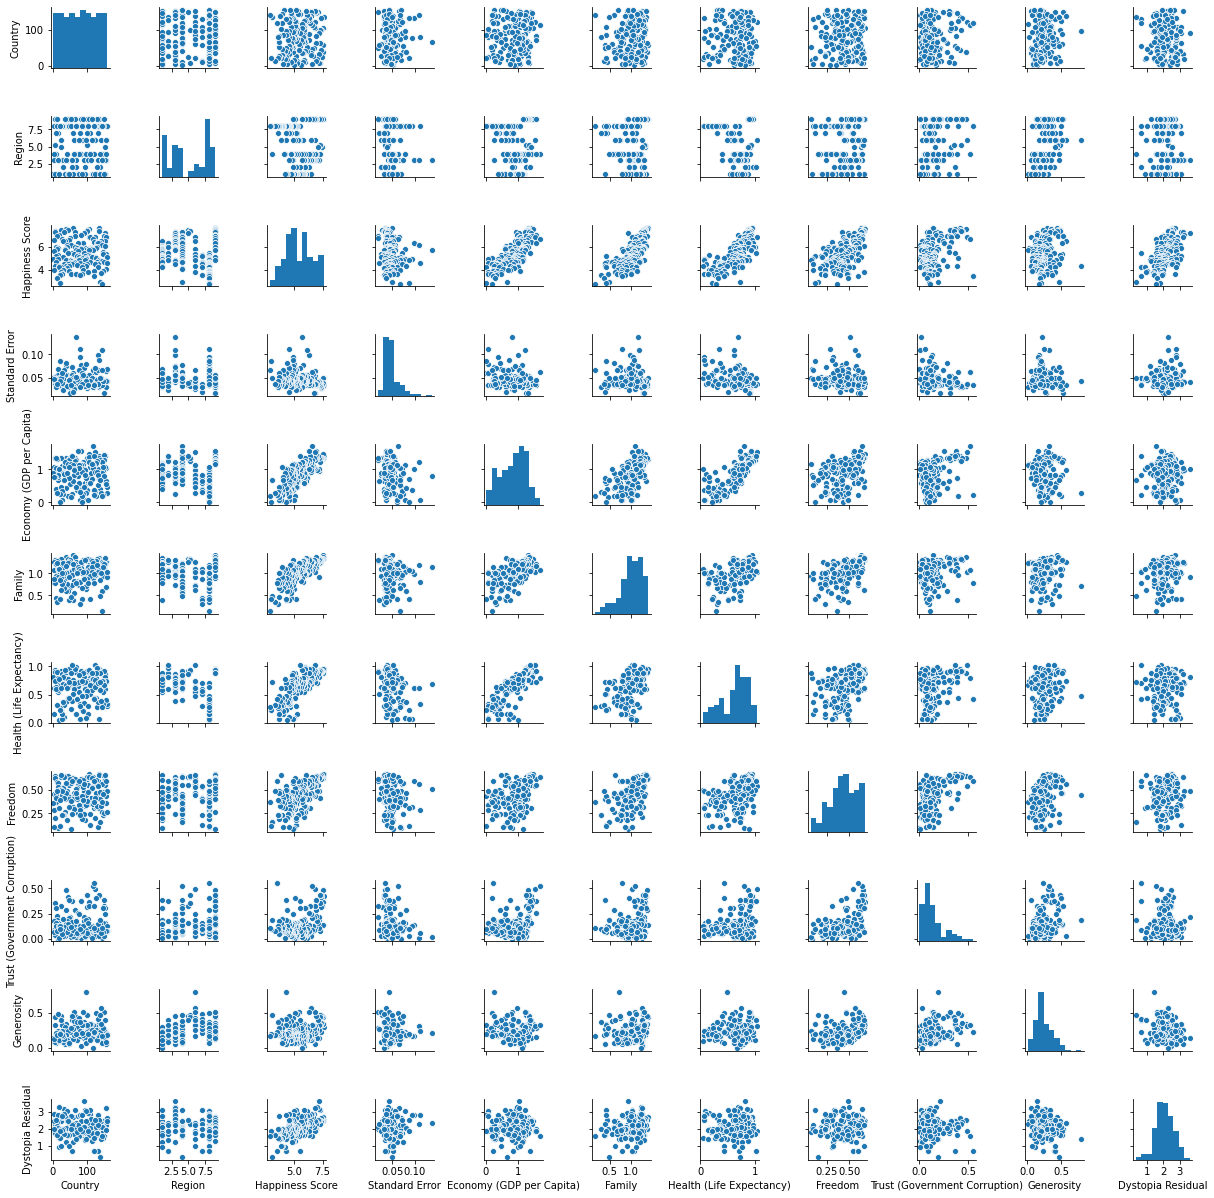

In [144]:
sns.pairplot(data=df,height=1.5)

In [145]:
df.skew()

Country                          0.000000
Region                          -0.122545
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.310454
Family                          -0.868792
Health (Life Expectancy)        -0.688168
Freedom                         -0.343595
Trust (Government Corruption)    1.392627
Generosity                       1.043938
Dystopia Residual               -0.238911
dtype: float64

In [146]:
#remove skewed data
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])
            
    
print(df.skew())

Country                          0.000000
Region                          -0.122545
Happiness Score                  0.097769
Standard Error                   1.890608
Economy (GDP per Capita)        -0.310454
Family                          -0.868792
Health (Life Expectancy)        -0.688168
Freedom                         -0.343595
Trust (Government Corruption)    1.188595
Generosity                       0.699887
Dystopia Residual               -0.238911
dtype: float64


In [148]:
z=np.abs(zscore(df))
print(z)


[[1.23955706 1.30308966 1.93736005 ... 2.24861001 0.52048735 0.75825809]
 [0.4648339  1.30308966 1.91458063 ... 0.02526231 1.57238862 1.09285682]
 [0.9296678  1.30308966 1.88479215 ... 2.69642711 0.86865148 0.71233526]
 ...
 [1.26169201 0.40516233 2.0761992  ... 0.44163784 1.82365414 3.20843049]
 [1.28382696 0.96143926 2.1646885  ... 0.34589311 0.30138687 0.48198451]
 [1.37236675 0.96143926 2.22251319 ... 0.28414556 0.56666713 0.96361241]]


In [149]:
df=df[(z<3).all(axis=1)]
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,7.587,0.033541,1.39651,1.34951,0.94143,0.66557,0.350502,0.259884,2.51738
1,58.0,9.0,7.561,0.047685,1.30232,1.40223,0.94784,0.62877,0.132299,0.362070,2.70201
2,37.0,9.0,7.527,0.032738,1.32548,1.36058,0.87464,0.64938,0.394451,0.293706,2.49204
3,105.0,9.0,7.522,0.038066,1.45900,1.33095,0.88521,0.66973,0.311176,0.297872,2.46531
4,24.0,5.0,7.427,0.034913,1.32629,1.32261,0.90563,0.63297,0.284856,0.377141,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66.0,8.0,3.655,0.050132,0.46534,0.77115,0.15185,0.46866,0.164853,0.183696,1.41723
151,20.0,8.0,3.587,0.042331,0.25812,0.85188,0.27125,0.39493,0.120730,0.196775,1.46494
152,79.0,7.0,3.575,0.030374,0.31982,0.30285,0.30335,0.23414,0.092752,0.311228,1.95210
154,13.0,8.0,3.340,0.035908,0.28665,0.35386,0.31910,0.48450,0.077054,0.167715,1.63328


In [150]:
x=df.drop('Happiness Score',axis=1)
x.shape

(151, 10)

In [153]:
y=df.iloc[:,2]
y.shape

(151,)

In [154]:
standard_scaler=StandardScaler()
x=standard_scaler.fit_transform(x)
x

array([[ 1.27098913,  1.29921497, -0.88553739, ...,  2.30447729,
         0.58249334,  0.7552117 ],
       [-0.43093309,  1.29921497,  0.17843197, ...,  0.03097975,
         1.68033829,  1.10707924],
       [-0.89509369,  1.29921497, -0.94593972, ...,  2.76239535,
         0.94586416,  0.70691877],
       ...,
       [ 0.03322752,  0.62229325, -1.12378939, ..., -0.38106883,
         1.13410569, -0.32209796],
       [-1.42556296,  0.96075411, -0.70752371, ..., -0.54463721,
        -0.40773066, -0.92970458],
       [-1.24873987,  0.96075411,  2.83769806, ..., -0.34854744,
        -0.27527773, -0.54904042]])

In [156]:
#splitting data into train,test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print("x_train.shape",x_train.shape,'x_test.shape',x_test.shape)
print("y_train.shape",y_train.shape,'y_test.shape',y_test.shape)

x_train.shape (120, 10) x_test.shape (31, 10)
y_train.shape (120,) y_test.shape (31,)


In [157]:
#Making all models and appending in a list
models=[]
models.append(('LinearRegression',LinearRegression()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
models.append(('KNeighborsRegressor',KNeighborsRegressor()))
models.append(('Lasso',Lasso()))
models.append(('Ridge',Ridge()))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor()))
models.append(('AdaBoostRegressor',AdaBoostRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor()))

In [158]:
#finding all metrics for all model
model_name_list=[]
cross_val_score_list=[]
r2_score_list=[]
score_list=[]
mse_list=[]
mae_list=[]


for reg_name,reg_model in models :

    reg_model.fit(x_train,y_train)
    y_pred=reg_model.predict(x_test)
    
    score_list.append(reg_model.score(x_train,y_train))
    cross_val_score_list.append(cross_val_score(reg_model,x,y,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    model_name_list.append(reg_name)

In [159]:
#printing metrics
metrics_df=pd.DataFrame({'Model Name':model_name_list,'Score':score_list,'Cross Val Score':cross_val_score_list,'R2 Score':r2_score_list,'Mean Squared Error':mse_list,'Mean Absolute Error':mae_list})
metrics_df

,Model Name,Score,Cross Val Score,R2 Score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.991674,-0.686264,0.975782,0.030072,0.069653
1,DecisionTreeRegressor,1.000000,-39.310653,0.849596,0.186759,0.327226
2,SVR,0.985152,-5.576323,0.937195,0.077986,0.160764
3,KNeighborsRegressor,0.909481,-18.805256,0.909126,0.112840,0.260445
4,Lasso,0.000000,-73.674641,-0.000492,1.242333,0.957831
5,Ridge,0.991651,-0.687183,0.975634,0.030255,0.070917
6,GradientBoostingRegressor,0.999166,-11.311353,0.932902,0.083317,0.204079
7,AdaBoostRegressor,0.952421,-18.114353,0.888956,0.137885,0.296495
8,RandomForestRegressor,0.984914,-11.426439,0.932955,0.083252,0.211699


In [160]:
reg_model=LinearRegression()
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=r_state)
    reg_model.fit(x_train,y_train)
    y_pred=reg_model.predict(x_test)
    r2_sc=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state : ",r_state,"   is : ",r2_sc)

r2 score corresponding to random state :  42    is :  0.9757820507262198
r2 score corresponding to random state :  43    is :  0.9892829233683299
r2 score corresponding to random state :  44    is :  0.9582898784046738
r2 score corresponding to random state :  45    is :  0.9593504302444615
r2 score corresponding to random state :  46    is :  0.9965889637314682
r2 score corresponding to random state :  47    is :  0.9973512658117838
r2 score corresponding to random state :  48    is :  0.9861007434807268
r2 score corresponding to random state :  49    is :  0.9734528352834109
r2 score corresponding to random state :  50    is :  0.9558111596009728
r2 score corresponding to random state :  51    is :  0.9842469742030341
r2 score corresponding to random state :  52    is :  0.9761331120427696
r2 score corresponding to random state :  53    is :  0.9984060227074462
r2 score corresponding to random state :  54    is :  0.9982702662998274
r2 score corresponding to random state :  55    is 

In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=56)
reg_model.fit(x_train,y_train)
y_pred=reg_model.predict(x_test)
r2_sc=r2_score(y_test,y_pred)
mean_abs_error=mean_absolute_error(y_test,y_pred)
mean_sqr_error=mean_squared_error(y_test,y_pred)
print("r2_sc",r2_sc,"mean_abs_error",mean_abs_error,"mean_sqr_error",mean_sqr_error)

r2_sc 0.9988341304968662 mean_abs_error 0.030757075231900806 mean_sqr_error 0.001357020199224138


In [162]:
#store model 
joblib.dump(reg_model,'HappyScore_LinearRegressor.pkl')

['HappyScore_LinearRegressor.pkl']